In [55]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
from numpy import arange, meshgrid

In [56]:
#with open('q4y.dat') as dat_file, open('q4y.csv', 'w') as csv_file:
#    csv_writer = csv.writer(csv_file)
    
#    for line in dat_file:
#        csv_writer.writerow(line)
##### code courtesy - https://stackoverflow.com/questions/36845032/how-to-convert-dat-to-csv-using-python/497861914
#### for generating .csv from .dat file

In [57]:
#reading .dat file
np_X = np.loadtxt('q4x.dat')

In [58]:
print(np.shape(np_X))
print(np_X)
m = np.shape(np_X)[0]
print(m)

(100, 2)
[[108. 368.]
 [131. 355.]
 [105. 469.]
 [ 86. 506.]
 [ 99. 402.]
 [ 87. 423.]
 [ 94. 440.]
 [117. 489.]
 [ 79. 432.]
 [ 99. 403.]
 [114. 428.]
 [123. 372.]
 [123. 372.]
 [109. 420.]
 [112. 394.]
 [104. 407.]
 [111. 422.]
 [126. 423.]
 [105. 434.]
 [119. 474.]
 [114. 396.]
 [100. 470.]
 [ 84. 399.]
 [102. 429.]
 [101. 469.]
 [ 85. 444.]
 [109. 397.]
 [106. 442.]
 [ 82. 431.]
 [118. 381.]
 [105. 388.]
 [121. 403.]
 [ 85. 451.]
 [ 83. 453.]
 [ 53. 427.]
 [ 95. 411.]
 [ 76. 442.]
 [ 95. 426.]
 [ 87. 402.]
 [ 70. 397.]
 [ 84. 511.]
 [ 91. 469.]
 [ 74. 451.]
 [101. 474.]
 [ 80. 398.]
 [ 95. 433.]
 [ 92. 404.]
 [ 99. 481.]
 [ 94. 491.]
 [ 87. 480.]
 [129. 420.]
 [148. 371.]
 [179. 407.]
 [152. 381.]
 [166. 377.]
 [124. 389.]
 [156. 419.]
 [131. 345.]
 [140. 362.]
 [144. 345.]
 [149. 393.]
 [108. 330.]
 [135. 355.]
 [170. 386.]
 [152. 301.]
 [153. 397.]
 [152. 301.]
 [136. 438.]
 [122. 306.]
 [148. 383.]
 [ 90. 385.]
 [145. 337.]
 [123. 364.]
 [145. 376.]
 [115. 354.]
 [134. 383.]
 [1

In [59]:
df_Y = pd.read_csv('q4y.csv', header=None)

In [60]:
print(df_Y)

    0  1  2  3  4  5   6
0   A  l  a  s  k  a  \n
1   A  l  a  s  k  a  \n
2   A  l  a  s  k  a  \n
3   A  l  a  s  k  a  \n
4   A  l  a  s  k  a  \n
.. .. .. .. .. .. ..  ..
95  C  a  n  a  d  a  \n
96  C  a  n  a  d  a  \n
97  C  a  n  a  d  a  \n
98  C  a  n  a  d  a  \n
99  C  a  n  a  d  a  \n

[100 rows x 7 columns]


In [61]:
np_Y = np.zeros(int(m))
for i in df_Y.index:
    if df_Y[0][i]=='A':
        np_Y[i]=0
    else:
        np_Y[i]=1
print(np_Y)
print(m)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
100


In [62]:
# data processing
print(m)
np_t = np_Y.reshape((int(m),1))
np_Y= np_t
va = np_X.var()
st_dev = math.sqrt(va)
me = np_X.mean()
np_X = np_X - me
np_X = np_X/st_dev
#print(np_X)
print(np_X.mean())
print(np_X.var())

100
1.687538997430238e-16
1.0


In [63]:
def mle_prior(np_Y):
     return np_Y.mean()

In [64]:
phi = mle_prior(np_Y)
print(phi)

0.5


In [65]:
dims = np.shape(np_X)[1]
print(dims)

2


In [66]:
def mle_mean_x0(np_X,np_Y,m,dims):
    s = 0
    np_t = np.zeros(dims)
    for i in range(m):
        if np_Y[i]==0:
            np_t += np_X[i]
            s += 1
    np_t /= s
    return np_t  

In [67]:
np_m0 = mle_mean_x0(np_X,np_Y,m,dims)
print(np_m0)

[-1.10106488  1.18368785]


In [68]:
def mle_mean_x1(np_X,np_Y,m,dims):
    s = 0
    np_t = np.zeros(dims)
    for i in range(m):
        if np_Y[i]==1:
            np_t += np_X[i]
            s += 1
    #print(s)
    np_t /= s
    return np_t 

In [69]:
np_m1 = mle_mean_x1(np_X,np_Y,m,dims)
print(np_m1)

[-0.8315402   0.74891723]


In [70]:
def mle_sigma(np_X,np_Y,m,dims,np_m_x0,np_m_x1):
    np_t=np.zeros((dims,dims))
    for i in range(m):
        if np_Y[i]==1:
            np_op = np_X[i]-np_m_x1
            np_op = np_op.reshape((dims,1))
            np_t += np.dot(np_op,np.transpose(np_op))
        else:
            np_op = np_X[i]-np_m_x0
            np_op = np_op.reshape((dims,1))
            np_t += np.dot(np_op,np.transpose(np_op))
    np_t /= m
    return np_t

In [71]:
np_sigma = mle_sigma(np_X,np_Y,m,dims,np_m0,np_m1)

In [72]:
print(np_sigma)

[[ 0.0136741  -0.00127227]
 [-0.00127227  0.05342744]]


In [73]:
def mle_sigma_x0(np_X,np_Y,m,dims,np_m_x0):
    np_t = np.zeros((dims,dims))
    s=0
    for i in range(m):
        if np_Y[i]==0:
            np_op = np_X[i]-np_m_x0
            np_op = np_op.reshape((dims,1))
            np_t += np.dot(np_op,np.transpose(np_op))
            s += 1
    np_t /= s
    return np_t

In [74]:
def mle_sigma_x1(np_X,np_Y,m,dims,np_m_x1):
    np_t = np.zeros((dims,dims))
    s=0
    for i in range(m):
        if np_Y[i]==1:
            np_op = np_X[i]-np_m_x1
            np_op = np_op.reshape((dims,1))
            np_t += np.dot(np_op,np.transpose(np_op))
            s += 1
    np_t /= s
    return np_t

In [75]:
print(dims)
sigma_x0 = mle_sigma_x0(np_X,np_Y,m,dims,np_m0)
sigma_x1 = mle_sigma_x1(np_X,np_Y,m,dims,np_m1)

2


In [76]:
# METH for decision boundary
#print(np.shape(np_m0))
np_m0=np_m0.reshape((dims,1))
np_m1=np_m1.reshape((dims,1))
#print(np.shape(np_m0))
c = np.dot(np.dot(np.transpose(np_m1),np.linalg.inv(np_sigma)),np_m1)
c -= np.dot(np.dot(np.transpose(np_m0),np.linalg.inv(np_sigma)),np_m0)
c /= 2
print(c)
np_temp = np_m1-np_m0
np_temp = np.transpose(np_temp)
print(np_temp)
np_temp = np.dot(np_temp,np.linalg.inv(np_sigma))
print(np_temp)
print(np_temp[0][1])
const = (c)/np_temp[0][1]
slope = (-1*np_temp[0][0])/np_temp[0][1]
print(const)
print(slope)
constant = const.item()
slopee = slope.item()
np_plt_x = np.linspace(-1.4,-.6,10000)
print(np.shape(np_plt_x))
np_plt_y = slopee*np_plt_x+constant
print(np.shape(np_plt_y))
print(constant)
print(slopee)

[[-25.78172222]]
[[ 0.26952468 -0.43477062]]
[[18.99554945 -7.68524788]]
-7.68524788271564
[[3.35470275]]
2.471689883934566
(10000,)
(10000,)
3.354702752038663
2.471689883934566


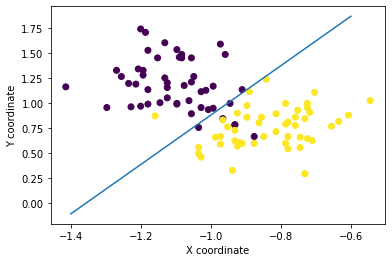

In [77]:
# plot of input data
#Plotting classification data
plt.scatter(np_X[:,0],np_X[:,1],c=np_Y)
plt.plot(np_plt_x,np_plt_y)
#plt.plot(np_plt_x2,np_plt_y2)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()

In [78]:
print(sigma_x0)
print(sigma_x1)

[[ 0.0121479  -0.0087677 ]
 [-0.0087677   0.06521665]]
[[0.01520029 0.00622316]
 [0.00622316 0.04163824]]


In [81]:
# METH for decision boundary quadratic
det0 = np.linalg.det(sigma_x0)
det1 = np.linalg.det(sigma_x1)
ratio_det = det0/det1
c1 = math.log(ratio_det)
c1 += np.dot(np.dot(np.transpose(np_m0),np.linalg.inv(sigma_x0)),np_m0)
c1 -= np.dot(np.dot(np.transpose(np_m1),np.linalg.inv(sigma_x1)),np_m1)
#print(c1)
mat_temp_0 = np.dot(np.transpose(np_m0),np.linalg.inv(sigma_x0)) #mean transpose sigma inverse
mat_temp_0_transpose = np.transpose(mat_temp_0)
mat_temp_1 = np.dot(np.transpose(np_m1),np.linalg.inv(sigma_x1)) #mean transpose sigma inverse
mat_temp_1_transpose = np.transpose(mat_temp_1)
#print(np.shape(mat_temp_0))
coeff_x0 = -1*mat_temp_0[0][0]
coeff_x0 -= mat_temp_0_transpose[0][0]
coeff_x0 += mat_temp_1[0][0]
coeff_x0 += mat_temp_1_transpose[0][0]
coeff_x1 = -1*mat_temp_0[0][1]
coeff_x1 -= mat_temp_0_transpose[1][0]
coeff_x1 += mat_temp_1[0][1]
coeff_x1 += mat_temp_1_transpose[1][0]
x0 = np.linalg.inv(sigma_x0)
coeff_x1_square = x0[0][0]
coeff_x1x2 = x0[0][1]+x0[1][0]
coeff_x2_square = x0[1][1]
x1 = np.linalg.inv(sigma_x1)
coeff_x1_square -= x1[0][0]
coeff_x1x2 -= (x1[0][1]+x1[1][0])
coeff_x2_square -= x1[1][1]

In [82]:
co=c1.item()
print(coeff_x1_square)
print(coeff_x2_square)
print(coeff_x1x2)
print(coeff_x0)
print(coeff_x1)
print(co)

21.088365575214894
-8.6005079422956
45.4591329700534
39.51149490775893
42.524023401336144
26.706030452397243


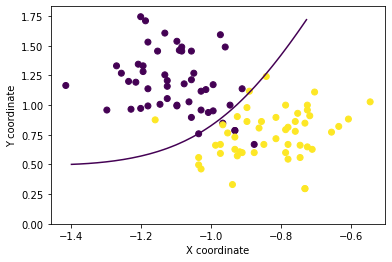

In [86]:
delta = 0.025
x,y = meshgrid(
    arange(-1.4, -0.6, delta),
    arange(0, 1.75, delta)
)
plt.contour(
    x, y,
    ((coeff_x1_square))*(x**2) + ((coeff_x2_square))*(y**2) + (coeff_x1x2)*x*y + (coeff_x0)*x + (coeff_x1)*y + co,
    [0]
)
plt.scatter(np_X[:,0],np_X[:,1],c=np_Y)
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.show()
# code for quadratic decision boundary plot courtesy - https://stackoverflow.com/questions/51794943/python-plot-non-linear-equation